Vy = 0:
t >    |       xx >          |     yy >            | vy >
0.865 15.783761675321319 3.62205797876909 0.005688130931274345

Xy = 0:
t >    |       xx >          |     yy >            | vy >
1.942 39.31021761417767 0.0001770621750107051 -6.579518472961698



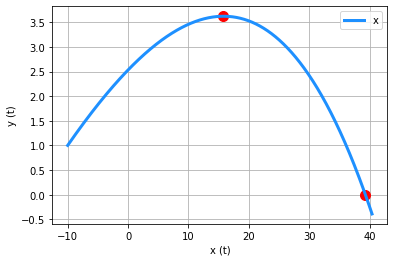

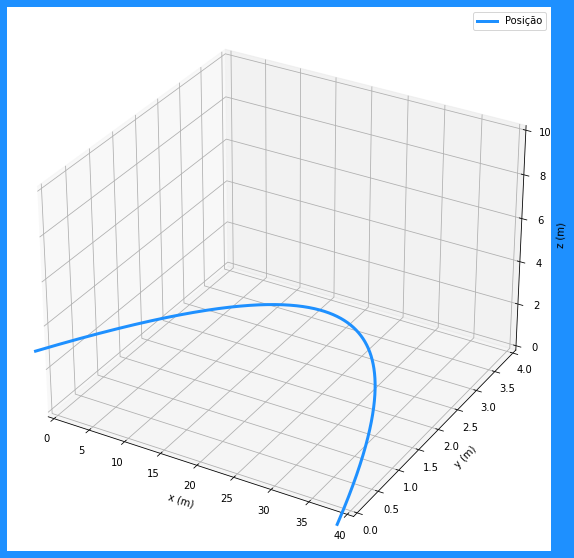

In [38]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Gravidade
g = 9.8

# Tempo inicial e final
ti = 0
tf = 2

# Massa
m = 0.057
r = 0.067 / 2
A = np.pi * r ** 2
P_ar = 1.225

# Velocidade terminal (paraquedas fechado)
vtx = 100 * 1000 / 3600
vty = 100 * 1000 / 3600
vtz = 100 * 1000 / 3600

# Angulo inicial
alpha = 10

# Posição inicial
xx0 = -10
xy0 = 1
xz0 = 0

# Aceleração inicial
ax0 = 0
ay0 = 0
az0 = 0

# Rotação inicial
wx = 0
wy = 0
wz = 100

# Velocidade inicial
v0 = 130 * 1000 / 3600

vx0 = v0 * np.cos(np.deg2rad(alpha))
vy0 = v0 * np.sin(np.deg2rad(alpha))
vz0 = 0

# Calcular D para a resistencia do ar
Dx = g / (vtx * np.abs(vtx))
Dy = g / (vty * np.abs(vty))
Dz = g / (vtz * np.abs(vtz))

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)



# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

xy = np.empty(n + 1)
vy = np.empty(n + 1)
ay = np.empty(n + 1)

xz = np.empty(n + 1)
vz = np.empty(n + 1)
az = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0
ax[0] = ax0

xy[0] = xy0
vy[0] = vy0
ay[0] = ay0

vz[0] = xz0
vz[0] = vz0
az[0] = az0



# Preencher os vetores x, v, a
for i in range(n):
    vTotal = np.sqrt(vx[i] ** 2 + vy[i] ** 2 + vz[i] ** 2)
    
    mag = 0.5 * P_ar * r * A
        
    amx = - mag * wz * vy[i] / m
    ax[i] = - Dx * np.abs(vTotal) * vx[i] + amx
    xx[i + 1] = xx[i] + vx[i] * dt
    vx[i + 1] = vx[i] + ax[i] * dt
    
    amy =   mag * wz * vx[i] / m
    ay[i] = - Dy * np.abs(vTotal) * vy[i] - g + amy
    xy[i + 1] = xy[i] + vy[i] * dt
    vy[i + 1] = vy[i] + ay[i] * dt
    
    amz = 0
    az[i] = 0
    xz[i + 1] = xz[i] + vz[i] * dt
    vz[i + 1] = vz[i] + az[i] * dt
    
      
      
# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (vy[i] > (0) and vy[i + 1] < (0)):
        print("Vy = 0:")
        print("t >    |       xx >          |     yy >            | vy >")
        print(t[i], xx[i], xy[i], vy[i])
        print("")
        plt.plot(xx[i], xy[i], "o", markersize="10", linewidth=5, color="red")
        break


# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (xy[i] > (0) and xy[i + 1] < (0)):
        print("Xy = 0:")
        print("t >    |       xx >          |     yy >            | vy >")
        print(t[i], xx[i], xy[i], vy[i])
        print("")
        plt.plot(xx[i], xy[i], "o", markersize="10", linewidth=5, color="red")
        break



# Plot
plt.plot(xx, xy, label="x",  linestyle='-', linewidth=3, color="dodgerblue")
plt.xlabel("x (t)")
plt.ylabel("y (t)")
plt.legend()         # Legenda só aparece com isto
plt.grid()


    
fig = plt.figure(figsize = (10, 10), facecolor="dodgerblue")
ax = fig.add_subplot(projection ='3d')

ax.plot(xx, xy, xz, label="Posição",  linestyle='-', linewidth=3, color="dodgerblue")

ax.set_xlim(0, 40)
ax.set_ylim(0, 4)
ax.set_zlim(0, 10)
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
    
    